### Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

In [84]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Загрузим таблицу и посмотрим, что там есть
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


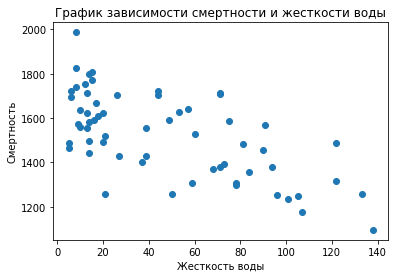

In [86]:
# построим точечный график для наглядности
plt.scatter(df['hardness'], df['mortality'])



plt.title("График зависимости смертности и жесткости воды")
plt.ylabel('Смертность')
plt.xlabel('Жесткость воды')
plt.show()

In [87]:
# Найдем корреляции:
# Корреляция Пирсона

df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [88]:
# Корреляция Спирмена

df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Получили, что жесткость воды и уровень смертности - обратно зависимы.\
То есть - чем жестче вода - тем ниже смертность

In [89]:
# Строим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [90]:
X = df[['hardness']]
Y = df['mortality']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [92]:
X.shape

(61, 1)

In [93]:
Y.shape

(61,)

In [94]:
model = LinearRegression()
model.fit(X_train, Y_train)
#model.score(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
model.coef_

array([-3.13167087])

In [96]:
model.intercept_

1668.9722977277095

Уравнение: Y = -3.13X +1668.97

In [97]:
# получим массив прогнозов
Y_pred = model.predict(X_test)
Y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [98]:
# сравним прогнозные и тестовые значения смертности (Y)
res_df = X_test.copy()

res_df['Y_pred'] = Y_pred
res_df['Y_test'] = Y_test
#res_df['Y_mis'] = Y_test - Y_pred
res_df.head()

,hardness,Y_pred,Y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307


Кое-где сходится, кое-где - нет.

In [99]:
# Рассчитаем коэффициент детерминации
model.score(X_test, Y_test) 

0.5046490611017092

Коэффициент детерминации - средний. То есть зависимость смертности от жесткости воды имеется, но небольшая. Явно на смертность влияют еще какие-то факторы.

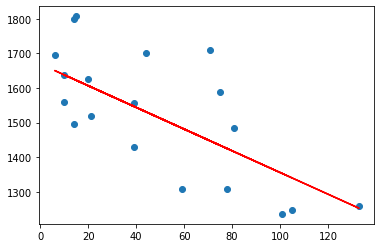

In [100]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, c='r')

### Альтернативный способ

In [101]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [103]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [104]:
X_const.shape

(42, 2)

In [106]:
model = sm.OLS(Y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        12:12:16   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

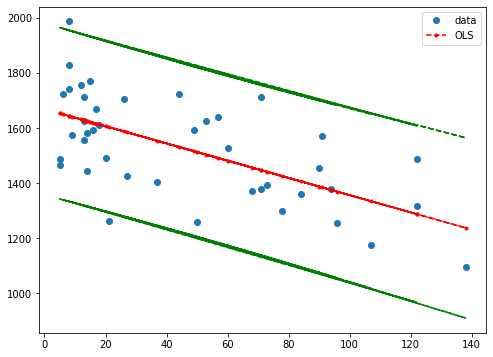

In [107]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], Y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

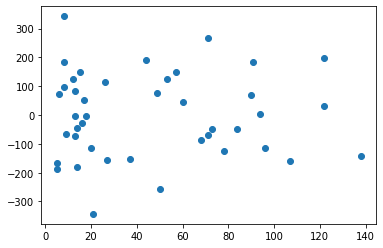

In [25]:
# построим график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

Остатки располагаются хаотично.

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

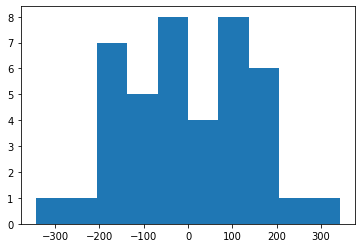

In [26]:
plt.hist(results.resid)

Остатки имеют практически нормальное распределение, с двумя небольшими провалами.

### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [112]:

df_north = df[df.location=='North'][['hardness', 'mortality']]
(df_north).head()

,hardness,mortality
1,17,1668
3,14,1800
4,18,1609
5,10,1558
6,15,1807


In [113]:
len(df_north)

35

35 населенных пунктов на севере

In [114]:
df_south = df[df.location=='South'][['hardness', 'mortality']]
(df_south).head()

,hardness,mortality
0,105,1247
2,5,1466
7,78,1299
9,84,1359
10,73,1392


In [115]:
len(df_south)

26

26 населенных пунктов на юге

In [116]:
# Корреляция Пирсона для северных городов

df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [117]:
# Корреляция Спирмена для северных городов

df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [118]:
# Корреляция Пирсона для южных городов

df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [119]:
# Корреляция Спирмена для южных городов

df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


## Построим модель линейной регрессии для северных городов

In [154]:
X = df_north[['hardness']]
Y = df_north['mortality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [155]:
X.shape

(35, 1)

In [156]:
Y.shape

(35,)

In [157]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
model.coef_

array([-1.52496549])

In [159]:
model.intercept_

1676.453976155025

In [160]:
Y_pred = model.predict(X_test)
Y_pred

array([1655.10445925, 1601.73066699, 1635.27990784, 1664.25425221,
       1656.62942474, 1667.3041832 , 1653.57949376, 1616.98032192,
       1664.25425221, 1655.10445925, 1655.10445925])

In [161]:
res_df = X_test.copy()

res_df['Y_pred'] = Y_pred
res_df['Y_test'] = Y_test
res_df.head()

,hardness,Y_pred,Y_test
3,14,1655.104459,1800
44,49,1601.730667,1591
35,27,1635.279908,1427
22,8,1664.254252,1742
42,13,1656.629425,1711


In [162]:
# Рассчитаем коэффициент детерминации
model.score(X_test, Y_test) 

0.09277934694062606

На севере жесткость воды и смертность практически независимы


In [163]:
# Посмотрим остатки:
X_const = sm.add_constant(X_train)

In [164]:
model = sm.OLS(Y_train, X_const)
results = model.fit()

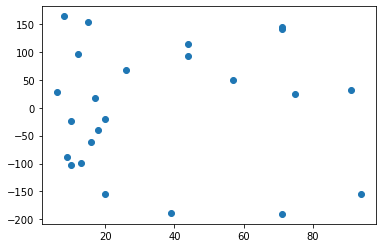

In [165]:
plt.scatter(X_const.iloc[:, 1], results.resid)

Остатки располагаются хаотично

## Построим модель линейной регрессии для южных городов

In [130]:
X = df_south[['mortality']]#.values
Y = df_south['hardness']#.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=26)

#model = LinearRegression()
#model.fit(X_train, Y_train)
#model.score(X_test, Y_test)

In [131]:
X.shape

(26, 1)

In [132]:
Y.shape

(26,)

In [133]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
model.coef_

array([-0.13871592])

In [135]:
model.intercept_

256.0566829711404

In [136]:
Y_pred = model.predict(X_test)
Y_pred

array([104.02402971,  81.41333402,  93.06547168,  84.60380028,
        36.74680633,  30.3658738 ,  50.06353508,  61.57695681])

In [137]:
res_df = X_test.copy()

res_df['Y_pred'] = Y_pred
res_df['Y_test'] = Y_test
res_df.head()

,mortality,Y_pred,Y_test
25,1096,104.024030,138
34,1259,81.413334,133
37,1175,93.065472,107
41,1236,84.603800,101
32,1581,36.746806,14


In [138]:
# Рассчитаем коэффициент детерминации
model.score(X_test, Y_test) 

0.5164458930169249

Коэффициент детерминации в южных городах - средний.

In [148]:
X_const = sm.add_constant(X_train)

In [149]:
model = sm.OLS(Y_train, X_const)
results = model.fit()

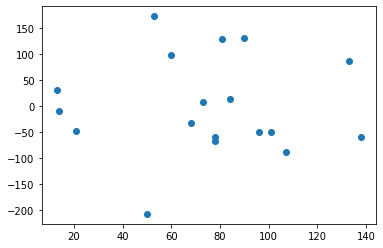

In [150]:
# построим график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

Остатки на юге также хаотичны.

Вывод: в рассматриваемых городах зависимость смертности от жесткости воды есть, но не является доминирующей. Однозначно, кроме жесткости воды на смертность влияют и другие факторы. Причем в северных городах влияние жесткости воды на смертность гораздо меньше, чем в городах южных. 